# Let's make some plots of our clusters: do the multiple-clusters events make problems for us?
## And let's do this to learn about pandas and uproot

In [19]:
%load_ext autoreload
%autoreload 2

In [1]:
#import libraries and some constants

import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
import uproot as ur

# metadata
layers = ["EMB1", "EMB2", "EMB3", "TileBar0", "TileBar1", "TileBar2"]
cell_size_phi = [0.098, 0.0245, 0.0245, 0.1, 0.1, 0.1]
cell_size_eta = [0.0031, 0.025, 0.05, 0.1, 0.1, 0.2]
len_phi = [4, 16, 16, 4, 4, 4]
len_eta = [128, 16, 8, 4, 4, 2]

In [20]:
# import our resolution utilities

import sys
sys.path.append('/home/mswiatlowski/start_tf/caloml-atlas/')
from  util import resolution_util as ru

In [7]:
plotpath = '/home/mswiatlowski/start_tf/caloml-atlas/clusters/Plots'

Let's load the data: does this work?

In [5]:
path = '/fast_scratch/atlas_images/v7/'

pp_file = ur.open(path+'piplus.root')
pp_tree = pp_file['ClusterTree']
pp = pp_tree.pandas.df("*", flatten=False)

And now, reduce to just the events with 1 cluster

In [9]:
pp_Single = pp[pp.nCluster==1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


<Figure size 432x288 with 0 Axes>

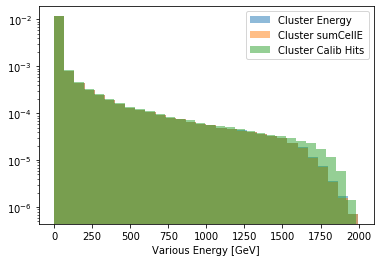

In [8]:
n_bins = 30
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist(pp['clusterE'], bins=n_bins, normed=True, alpha=0.5, label='Cluster Energy')
plt.hist(pp['cluster_sumCellE'], bins=n_bins, normed=True, alpha=0.5, label='Cluster sumCellE')
plt.hist(pp['cluster_ENG_CALIB_TOT'], bins=n_bins, normed=True, alpha=0.5, label='Cluster Calib Hits')
plt.yscale('log')
plt.xlabel('Various Energy [GeV]')
plt.legend()
plt.savefig(plotpath+'/hist_energy.pdf')
plt.show()

In [12]:
pp_Multi = pp[pp.nCluster>1][pp.clusterIndex!=0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


<Figure size 432x288 with 0 Axes>

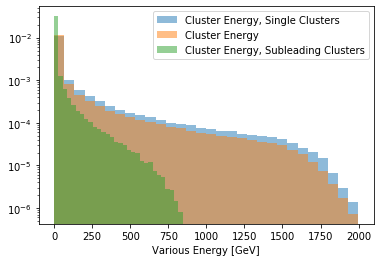

In [15]:
n_bins = 30
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist(pp_Single['clusterE'], bins=n_bins, normed=True, alpha=0.5, label='Cluster Energy, Single Clusters')
plt.hist(pp['clusterE'], bins=n_bins, normed=True, alpha=0.5, label='Cluster Energy')
plt.hist(pp_Multi['clusterE'], bins=n_bins, normed=True, alpha=0.5, label='Cluster Energy, Subleading Clusters')
plt.yscale('log')
plt.xlabel('Various Energy [GeV]')
plt.legend()
plt.savefig(plotpath+'/hist_energy_SingleMulti.pdf')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


<Figure size 432x288 with 0 Axes>

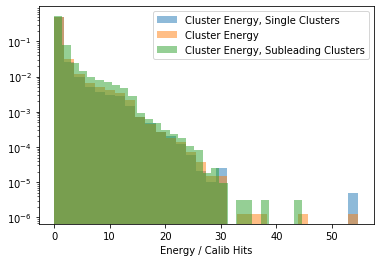

In [16]:
n_bins = 30
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist(pp_Single['clusterE']/pp_Single.cluster_ENG_CALIB_TOT, bins=n_bins, normed=True, alpha=0.5, label='Cluster Energy, Single Clusters')
plt.hist(pp['clusterE']/pp.cluster_ENG_CALIB_TOT, bins=n_bins, normed=True, alpha=0.5, label='Cluster Energy')
plt.hist(pp_Multi['clusterE'] / pp_Multi.cluster_ENG_CALIB_TOT, bins=n_bins, normed=True, alpha=0.5, label='Cluster Energy, Subleading Clusters')
plt.yscale('log')
plt.xlabel('Energy / Calib Hits')
plt.legend()
plt.savefig(plotpath+'/hist_response_SingleMulti.pdf')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


<Figure size 432x288 with 0 Axes>

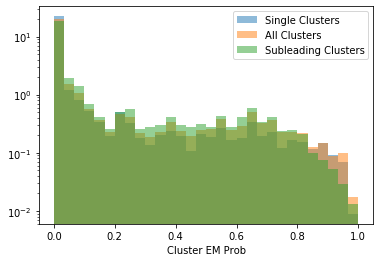

In [18]:
n_bins = 30
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist(pp_Single.cluster_EM_PROBABILITY, bins=n_bins, normed=True, alpha=0.5, label='Single Clusters')
plt.hist(pp.cluster_EM_PROBABILITY, bins=n_bins, normed=True, alpha=0.5, label='All Clusters')
plt.hist(pp_Multi.cluster_EM_PROBABILITY, bins=n_bins, normed=True, alpha=0.5, label='Subleading Clusters')
plt.yscale('log')
plt.xlabel('Cluster EM Prob')
plt.legend()
plt.savefig(plotpath+'/hist_emResponse_SingleMulti.pdf')
plt.show()

All these are looking super consistent so far

<Figure size 432x288 with 0 Axes>

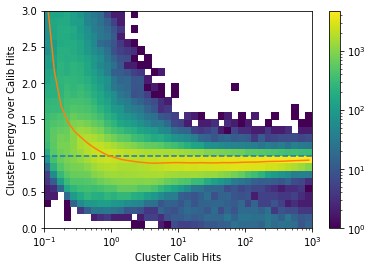

In [24]:
xcenter, medAll = ru.responsePlot(pp.cluster_ENG_CALIB_TOT, pp.clusterE/pp.cluster_ENG_CALIB_TOT, 
                    name = plotpath+'hist_2D_calib_vs_ratio_pp_profile')

<Figure size 432x288 with 0 Axes>

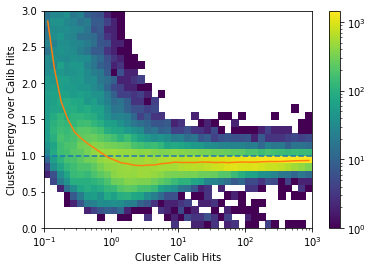

In [23]:
xcenter, medSingle = ru.responsePlot(pp_Single.cluster_ENG_CALIB_TOT, 
                      pp_Single.clusterE/pp_Single.cluster_ENG_CALIB_TOT, 
                      name = plotpath+'hist_2D_calib_vs_ratio_pp_profile_Single')

<Figure size 432x288 with 0 Axes>

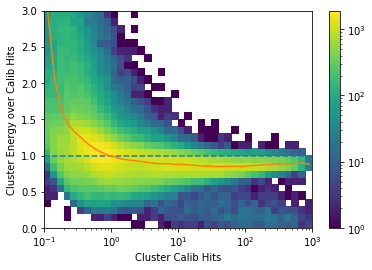

In [25]:
xcenter, medMulti = ru.responsePlot(pp_Multi.cluster_ENG_CALIB_TOT, 
                      pp_Multi.clusterE/pp_Multi.cluster_ENG_CALIB_TOT, 
                      name = plotpath+'hist_2D_calib_vs_ratio_pp_profile_Multi')

<Figure size 432x288 with 0 Axes>

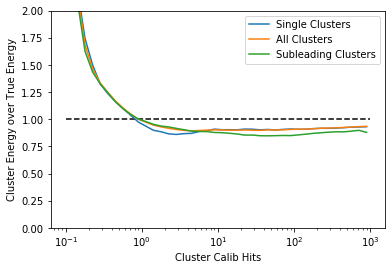

In [27]:
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.plot([0.1, 1000], [1, 1], linestyle='--',color='black')
plt.plot(xcenter, medSingle, label = 'Single Clusters')
plt.plot(xcenter, medAll, label = 'All Clusters')
plt.plot(xcenter, medMulti, label = 'Subleading Clusters')
plt.xscale('log')
plt.ylim(0,2)
plt.xlabel('Cluster Calib Hits')
plt.ylabel('Cluster Energy over True Energy')
plt.legend()
plt.savefig(plotpath+'hist_2D_calib_vs_ratio_pp_profile_Overlay.pdf')
plt.show()

In general the response also all looks ok as a function of the calib hits

<Figure size 432x288 with 0 Axes>

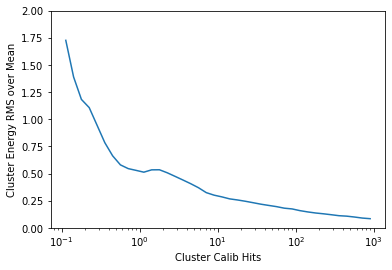

In [32]:
xcenter, iqrOverMedAll = ru.resolutionPlot(pp.cluster_ENG_CALIB_TOT, 
                            pp.cluster_ENG_CALIB_TOT/pp.clusterE,
                            plotpath+'hist_2D_calib_vs_ratio_pp_iqrMed', 
                            statistic='iqrOverMed')

<Figure size 432x288 with 0 Axes>

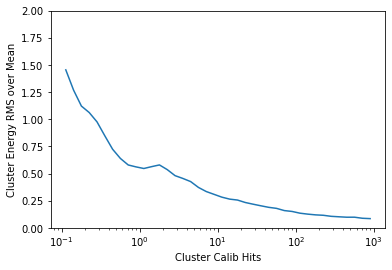

In [31]:
xcenter, iqrOverMedSingle = ru.resolutionPlot(pp_Single.cluster_ENG_CALIB_TOT, 
                            pp_Single.cluster_ENG_CALIB_TOT/pp_Single.clusterE,
                            plotpath+'hist_2D_calib_vs_ratio_pp_iqrMed_Single', 
                            statistic='iqrOverMed')

<Figure size 432x288 with 0 Axes>

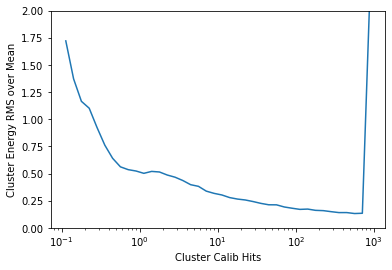

In [30]:
xcenter, iqrOverMedMulti = ru.resolutionPlot(pp_Multi.cluster_ENG_CALIB_TOT, 
                            pp_Multi.cluster_ENG_CALIB_TOT/pp_Multi.clusterE,
                            plotpath+'hist_2D_calib_vs_ratio_pp_iqrMed_Multi', 
                            statistic='iqrOverMed')

<Figure size 432x288 with 0 Axes>

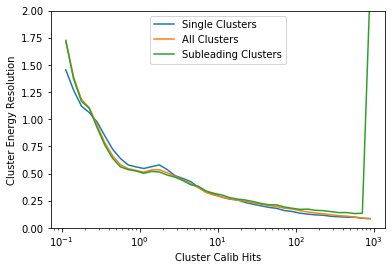

In [47]:
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.plot(xcenter, iqrOverMedSingle, label = 'Single Clusters')
plt.plot(xcenter, iqrOverMedAll, label = 'All Clusters')
plt.plot(xcenter, iqrOverMedMulti, label = 'Subleading Clusters')
plt.xscale('log')
plt.ylim(0,2)
plt.xlabel('Cluster Calib Hits')
plt.ylabel('Cluster Energy Resolution')
plt.legend()
plt.savefig(plotpath+'hist_2D_calib_vs_ratio_pp_iqrMed_Overlay.pdf')
plt.show()

Resolutions all look pretty compatible too: no big difference in one or the other, which is comforting!

## Should switch over to pi0 too to validate this

In [39]:
p0_file = ur.open(path+'pi0.root')
p0_tree = p0_file['ClusterTree']
p0 = p0_tree.pandas.df("*", flatten=False)

In [40]:
p0_Single = p0[p0.nCluster==1]
p0_Multi  = p0_Multi = p0[p0.nCluster>1][p0.clusterIndex!=0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


<Figure size 432x288 with 0 Axes>

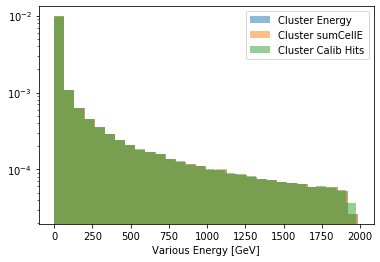

In [41]:
n_bins = 30
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist(p0['clusterE'], bins=n_bins, normed=True, alpha=0.5, label='Cluster Energy')
plt.hist(p0['cluster_sumCellE'], bins=n_bins, normed=True, alpha=0.5, label='Cluster sumCellE')
plt.hist(p0['cluster_ENG_CALIB_TOT'], bins=n_bins, normed=True, alpha=0.5, label='Cluster Calib Hits')
plt.yscale('log')
plt.xlabel('Various Energy [GeV]')
plt.legend()
plt.savefig(plotpath+'/hist_p0_energy.pdf')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


<Figure size 432x288 with 0 Axes>

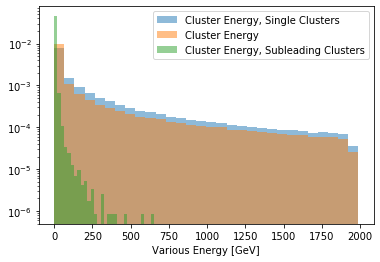

In [42]:
n_bins = 30
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist(p0_Single['clusterE'], bins=n_bins, normed=True, alpha=0.5, label='Cluster Energy, Single Clusters')
plt.hist(p0['clusterE'], bins=n_bins, normed=True, alpha=0.5, label='Cluster Energy')
plt.hist(p0_Multi['clusterE'], bins=n_bins, normed=True, alpha=0.5, label='Cluster Energy, Subleading Clusters')
plt.yscale('log')
plt.xlabel('Various Energy [GeV]')
plt.legend()
plt.savefig(plotpath+'/hist_p0_energy_SingleMulti.pdf')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


<Figure size 432x288 with 0 Axes>

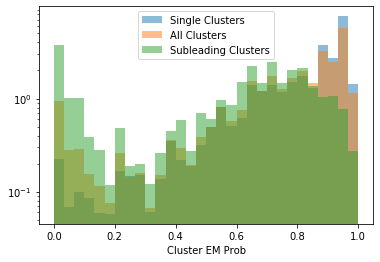

In [43]:
n_bins = 30
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist(p0_Single.cluster_EM_PROBABILITY, bins=n_bins, normed=True, alpha=0.5, label='Single Clusters')
plt.hist(p0.cluster_EM_PROBABILITY, bins=n_bins, normed=True, alpha=0.5, label='All Clusters')
plt.hist(p0_Multi.cluster_EM_PROBABILITY, bins=n_bins, normed=True, alpha=0.5, label='Subleading Clusters')
plt.yscale('log')
plt.xlabel('Cluster EM Prob')
plt.legend()
plt.savefig(plotpath+'/hist_p0_emResponse_SingleMulti.pdf')
plt.show()

Subleading clusters look less EM like-- interesting

<Figure size 432x288 with 0 Axes>

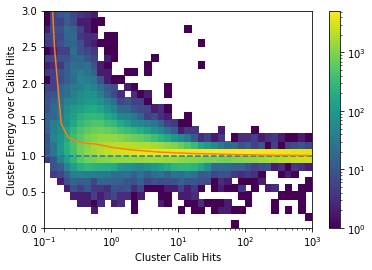

In [49]:
xcenter, medp0All = ru.responsePlot(p0.cluster_ENG_CALIB_TOT, p0.clusterE/p0.cluster_ENG_CALIB_TOT, 
                    name = plotpath+'hist_2D_calib_vs_ratio_p0_profile')

<Figure size 432x288 with 0 Axes>

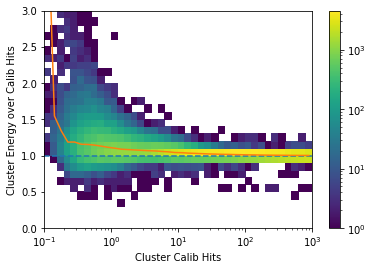

In [45]:
xcenter, medp0Single = ru.responsePlot(p0_Single.cluster_ENG_CALIB_TOT, p0_Single.clusterE/p0_Single.cluster_ENG_CALIB_TOT, 
                    name = plotpath+'hist_2D_calib_vs_ratio_p0_profile_Single')

<Figure size 432x288 with 0 Axes>

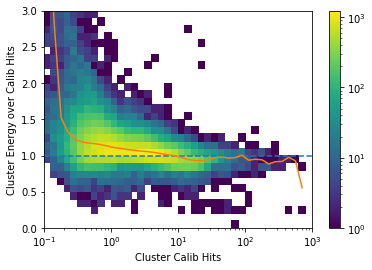

In [48]:
xcenter, medp0Multi = ru.responsePlot(p0_Multi.cluster_ENG_CALIB_TOT, p0_Multi.clusterE/p0_Multi.cluster_ENG_CALIB_TOT, 
                    name = plotpath+'hist_2D_calib_vs_ratio_p0_profile_Multi')

<Figure size 432x288 with 0 Axes>

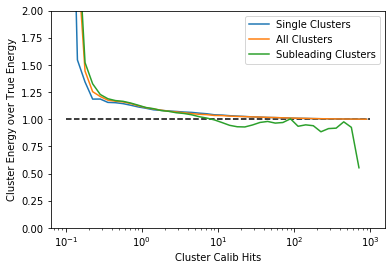

In [50]:
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.plot([0.1, 1000], [1, 1], linestyle='--',color='black')
plt.plot(xcenter, medp0Single, label = 'Single Clusters')
plt.plot(xcenter, medp0All, label = 'All Clusters')
plt.plot(xcenter, medp0Multi, label = 'Subleading Clusters')
plt.xscale('log')
plt.ylim(0,2)
plt.xlabel('Cluster Calib Hits')
plt.ylabel('Cluster Energy over True Energy')
plt.legend()
plt.savefig(plotpath+'hist_2D_calib_vs_ratio_p0_profile_Overlay.pdf')
plt.show()

<Figure size 432x288 with 0 Axes>

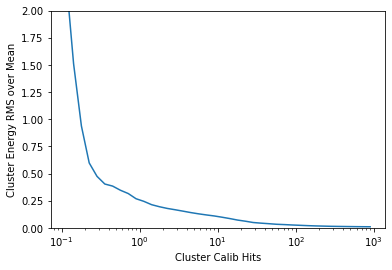

In [51]:
xcenter, iqrOverMedp0All = ru.resolutionPlot(p0.cluster_ENG_CALIB_TOT, 
                            p0.cluster_ENG_CALIB_TOT/p0.clusterE,
                            plotpath+'hist_2D_calib_vs_ratio_p0_iqrMed', 
                            statistic='iqrOverMed')

<Figure size 432x288 with 0 Axes>

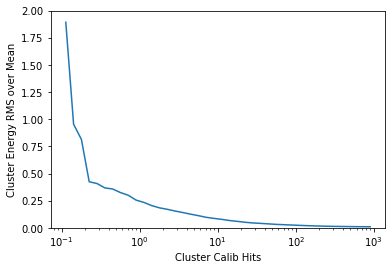

In [52]:
xcenter, iqrOverMedp0Single = ru.resolutionPlot(p0_Single.cluster_ENG_CALIB_TOT, 
                            p0_Single.cluster_ENG_CALIB_TOT/p0_Single.clusterE,
                            plotpath+'hist_2D_calib_vs_ratio_p0_iqrMed_Single', 
                            statistic='iqrOverMed')

<Figure size 432x288 with 0 Axes>

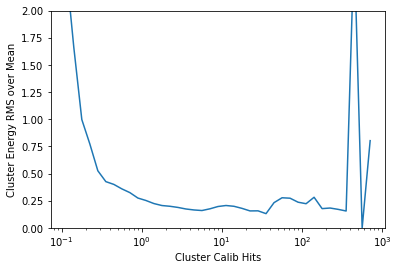

In [53]:
xcenter, iqrOverMedp0Multi = ru.resolutionPlot(p0_Multi.cluster_ENG_CALIB_TOT, 
                            p0_Multi.cluster_ENG_CALIB_TOT/p0_Multi.clusterE,
                            plotpath+'hist_2D_calib_vs_ratio_p0_iqrMed_Multi', 
                            statistic='iqrOverMed')

<Figure size 432x288 with 0 Axes>

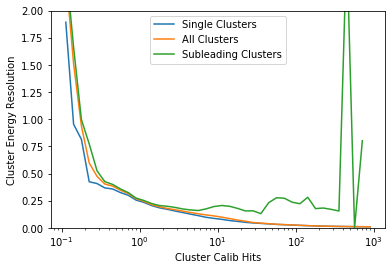

In [54]:
plt.cla(); plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.plot(xcenter, iqrOverMedp0Single, label = 'Single Clusters')
plt.plot(xcenter, iqrOverMedp0All, label = 'All Clusters')
plt.plot(xcenter, iqrOverMedp0Multi, label = 'Subleading Clusters')
plt.xscale('log')
plt.ylim(0,2)
plt.xlabel('Cluster Calib Hits')
plt.ylabel('Cluster Energy Resolution')
plt.legend()
plt.savefig(plotpath+'hist_2D_calib_vs_ratio_p0_iqrMed_Overlay.pdf')
plt.show()